In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data from StudentPerformance.csv into df object.

In [2]:
df = pd.read_csv('../data_clean/StudentsPerformance.csv')
print(df.to_string())

     Unnamed: 0  gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0             0  female        group B           bachelor's degree      standard                    none          72             72             74
1             1  female        group C                some college      standard               completed          69             90             88
2             2  female        group B             master's degree      standard                    none          90             95             93
3             3    male        group A          associate's degree  free/reduced                    none          47             57             44
4             4    male        group C                some college      standard                    none          76             78             75
5             5  female        group B          associate's degree      standard                    none          71  

In [3]:
df.columns

Index(['Unnamed: 0', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# creating a new column Average by taking the average of all the available scores in the given data.

# The below Scatter Plot graph describes the position of each circle corresponding to math score and reading score.

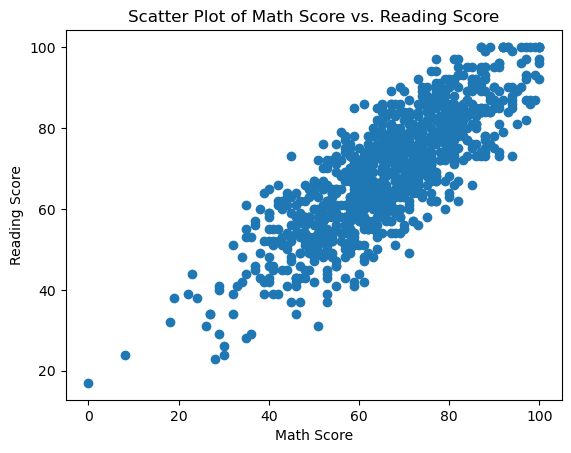

In [4]:
math_scores = df['math score']
reading_scores = df['reading score']

plt.scatter(math_scores, reading_scores)

plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Scatter Plot of Math Score vs. Reading Score')

plt.show()

In [5]:
df["Average"]=(df["math score"]+df["reading score"]+df["writing score"])/3
print(df["Average"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average, Length: 1000, dtype: float64


In [6]:

def Grade(Avg):
    if Avg >= 93:
        return 'A'
    if Avg >= 90:
        return 'A-'
    if Avg >= 85:
        return 'B'
    if Avg >= 81:
        return 'C'
    if Avg >= 74:
        return 'D'
    if Avg >= 60:
        return 'E'
    else: 
        return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Average"]),axis=1)
    

# using Seaborn for analysis

In [7]:
import seaborn as sns
import numpy as np

#  The Below graph describes how the students performance is effected by the Lunch.

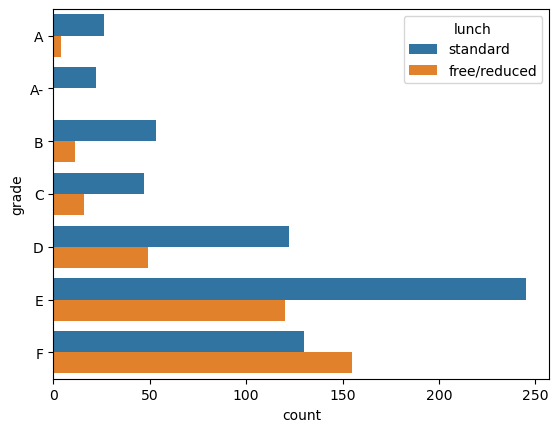

In [8]:
pt = sns.countplot(y="grade", hue="lunch", data=df, order=["A", "A-", "B", "C", "D", "E", "F"])
pic = pt.get_figure()
pic.savefig("../results/Grade_Lunch.png")

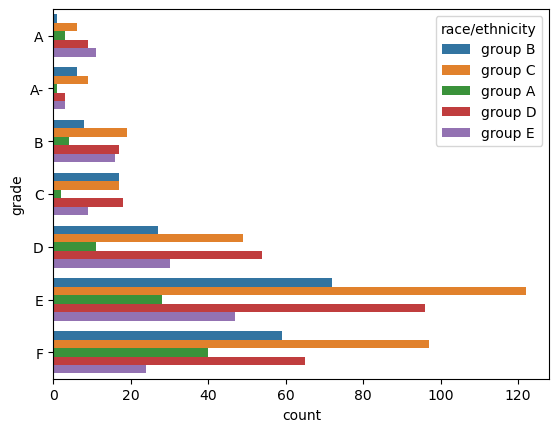

In [9]:
pt = sns.countplot(y="grade", hue="race/ethnicity", data=df, order=["A", "A-", "B", "C", "D", "E", "F"])
pic = pt.get_figure()
pic.savefig("../results/Grade_Ethnicity.png")

# The below plot describes the grades achieved by the male students and female students who are grouped by gender.

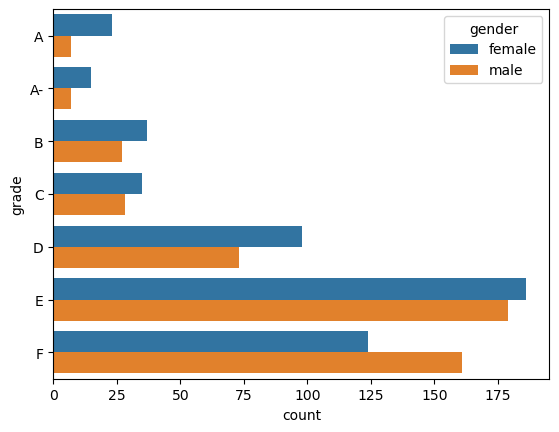

In [10]:
pt = sns.countplot(y="grade", hue="gender", data=df, order=["A", "A-", "B", "C", "D", "E", "F"])
pic = pt.get_figure()
pic.savefig("../results/Grade_Gender.png")

# The below scatter plot des the relationship between the average score and math score and grouped by gender

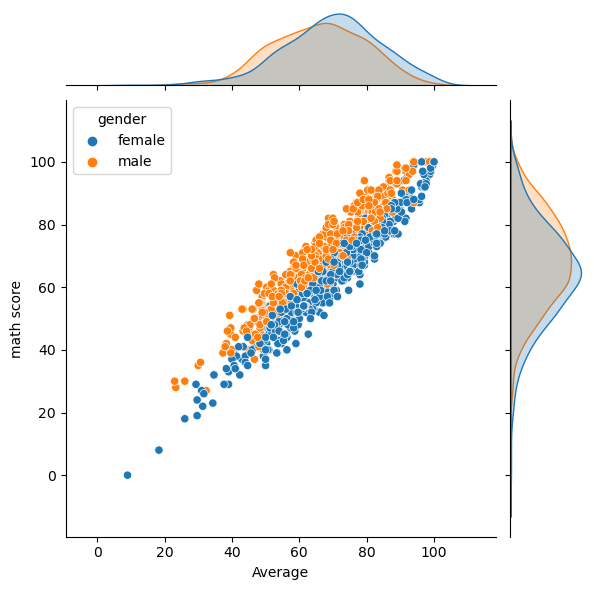

In [11]:
sns.jointplot(x ='Average', y ='math score', hue='gender', data = df)

# The below scatter plot describes the relationship between the average score and writing score when grouped by gender

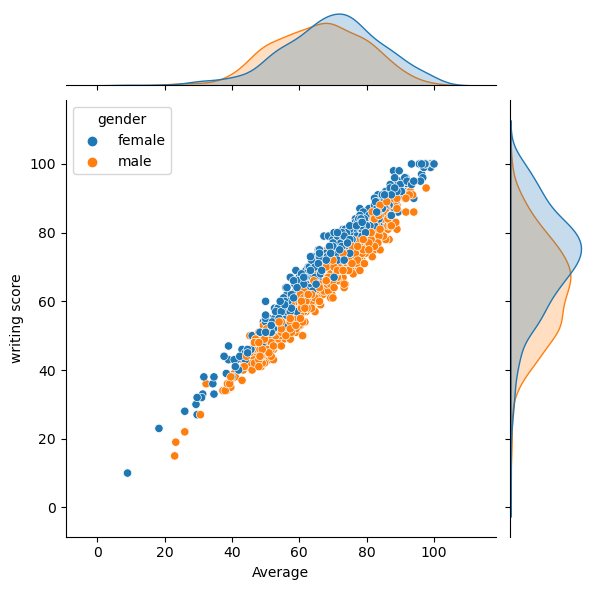

In [12]:
sns.jointplot(x = 'Average', y = 'writing score', hue = 'gender', data = df)

# The below scatter plot describes the relation between the average score and reading score when grouped by gender

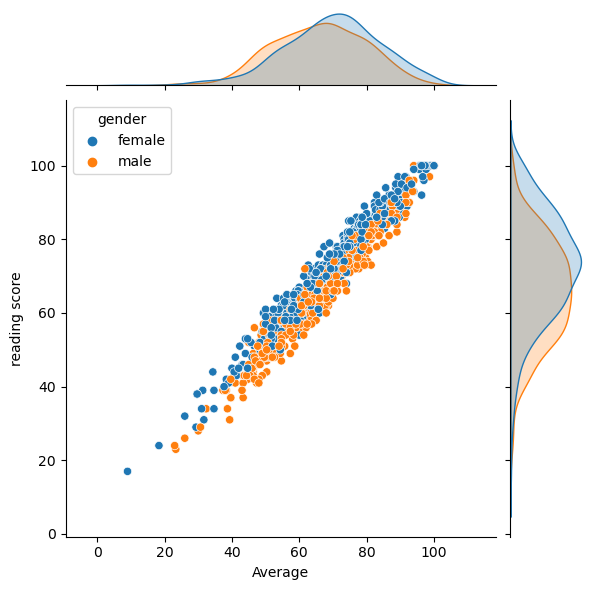

In [13]:
sns.jointplot(x = 'Average', y = 'reading score', hue = 'gender', data = df)